# 🧠 Visualize CNN Activation Maps on MNIST
This notebook trains a simple CNN on the MNIST dataset, then visualizes activation maps from a selected convolutional layer using PyTorch hooks.

## 📦 1. Import Required Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## 🧠 2. Define CNN Model

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(16 * 7 * 7, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 7 * 7)
        x = self.fc(x)
        return x

model = SimpleCNN()

## 📥 3. Load MNIST Dataset

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 59.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.76MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.00MB/s]


## 🏋️ 4. Train the Model (Quick Training - 1 Epoch)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(1):
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} complete, Loss: {loss.item():.4f}")

Epoch 1 complete, Loss: 0.0361


## 🔍 5. Register Hook and Capture Activation Maps

In [ ]:
activation_maps = {}

def hook_fn(module, input, output):
    activation_maps['conv1'] = output

# Register hook on conv1
hook = model.conv1.register_forward_hook(hook_fn)

## 📸 6. Get a Sample Test Image and Forward Pass

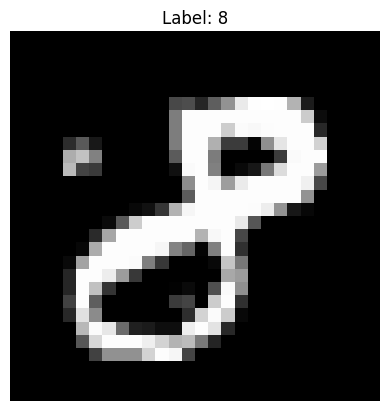

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)
_ = model(images)
img = images[0].squeeze().numpy()

# Show input image
plt.imshow(img, cmap='gray')
plt.title(f"Label: {labels.item()}")
plt.axis('off')
plt.show()

## 🖼️ 7. Visualize Activation Maps from conv1

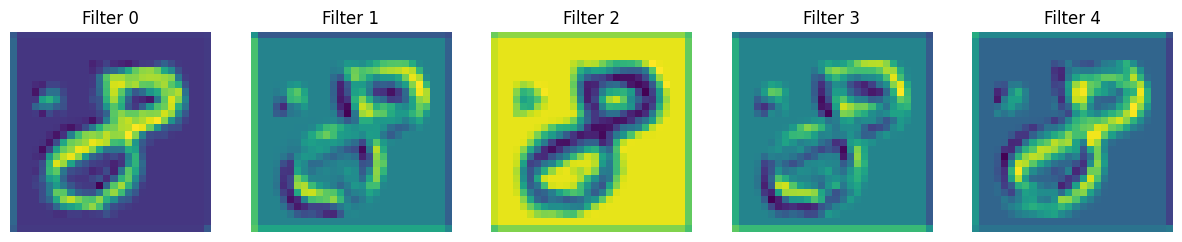

In [ ]:
activations = activation_maps['conv1'].squeeze(0)
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(activations[i].detach().numpy(), cmap='viridis')
    axes[i].set_title(f"Filter {i}")
    axes[i].axis('off')
plt.show()